In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
heart_data1=pd.read_csv('file.csv')
heart_data2=pd.read_csv('cleveland.csv')

In [5]:
#0 absence diagnosis, 1 presence diagnosis
Diagnosis={1:0,2:1}
heart_data1['Diagnosis']= heart_data1['Diagnosis'].map(Diagnosis) 

In [6]:
Diagnosis={0:0,1:1,2:1,3:1,4:1}
heart_data2['Diagnosis']= heart_data2['Diagnosis'].map(Diagnosis) 

In [7]:
frames = [heart_data1, heart_data2]
data = pd.concat(frames)
data.count()

age                   573
sex                   573
cp                    573
restbps               573
chol                  573
fbs                   573
restecg               573
maximum_heart_rate    573
exang                 573
oldpeak               573
slope                 573
major_vessels         569
thal                  571
Diagnosis             573
dtype: int64

# Data Preprocessing

In [8]:
data.isnull().any().sum()

2

In [9]:
heart_data=data.dropna()
heart_data.shape

(567, 14)

In [10]:
data1=heart_data
data1.head()

,age,sex,cp,restbps,chol,fbs,restecg,maximum_heart_rate,exang,oldpeak,slope,major_vessels,thal,Diagnosis
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


In [11]:
data2=pd.get_dummies(data1,prefix=None, prefix_sep='_', dummy_na=False, columns=['cp','restecg','slope','major_vessels','thal'])

In [12]:
data2.columns

Index(['age', 'sex', 'restbps', 'chol', 'fbs', 'maximum_heart_rate', 'exang',
       'oldpeak', 'Diagnosis', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0',
       'major_vessels_2.0', 'major_vessels_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

In [13]:
data2.shape

(567, 26)

In [14]:
data3=data2.drop(['sex','Diagnosis', 'fbs','exang','cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
                  'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0','major_vessels_2.0',
                  'major_vessels_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],axis=1) 

In [15]:
data3.head()

,age,restbps,chol,maximum_heart_rate,oldpeak
0,70.0,130.0,322.0,109.0,2.4
1,67.0,115.0,564.0,160.0,1.6
2,57.0,124.0,261.0,141.0,0.3
3,64.0,128.0,263.0,105.0,0.2
4,74.0,120.0,269.0,121.0,0.2


In [16]:
from sklearn.preprocessing import MinMaxScaler
names = data3.columns
scaler = MinMaxScaler(feature_range=(0,1))
data4 = scaler.fit_transform(data3)
data4 = pd.DataFrame(data4, columns=names)

In [17]:
data5=data2.drop(['age','restbps','chol','maximum_heart_rate','oldpeak'],axis=1)

In [18]:
data4.shape,data5.shape

((567, 5), (567, 21))

In [19]:
data4.columns

Index(['age', 'restbps', 'chol', 'maximum_heart_rate', 'oldpeak'], dtype='object')

In [20]:
data5.columns

Index(['sex', 'fbs', 'exang', 'Diagnosis', 'cp_1.0', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0',
       'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0',
       'major_vessels_2.0', 'major_vessels_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

In [21]:
print(type(data5))
print(type(data4))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
data4.reset_index(drop=True, inplace=True)
data5.reset_index(drop=True, inplace=True)
df = pd.concat([data4, data5], axis=1)

In [23]:
df.shape

(567, 26)

In [24]:
count = df.Diagnosis.value_counts()
count

0    310
1    257
Name: Diagnosis, dtype: int64

In [25]:
df.describe()

,age,restbps,chol,maximum_heart_rate,oldpeak,sex,fbs,exang,Diagnosis,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,major_vessels_0.0,major_vessels_1.0,major_vessels_2.0,major_vessels_3.0,thal_3.0,thal_6.0,thal_7.0
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,0.531048,0.354031,0.279566,0.600280,0.169824,0.677249,0.146384,0.328042,0.453263,0.075838,...,0.474427,0.456790,0.068783,0.589065,0.216931,0.125220,0.068783,0.557319,0.056437,0.386243
std,0.188962,0.167878,0.118303,0.175788,0.186322,0.467941,0.353803,0.469915,0.498250,0.264972,...,0.499787,0.498569,0.253308,0.492438,0.412519,0.331261,0.253308,0.497142,0.230968,0.487317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.196347,0.473282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,0.339623,0.269406,0.625954,0.129032,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.666667,0.433962,0.344749,0.725191,0.258065,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df['sex'] = df['sex'].apply(pd.to_numeric)

In [27]:
df.dtypes

age                   float64
restbps               float64
chol                  float64
maximum_heart_rate    float64
oldpeak               float64
sex                   float64
fbs                   float64
exang                 float64
Diagnosis               int64
cp_1.0                  uint8
cp_2.0                  uint8
cp_3.0                  uint8
cp_4.0                  uint8
restecg_0.0             uint8
restecg_1.0             uint8
restecg_2.0             uint8
slope_1.0               uint8
slope_2.0               uint8
slope_3.0               uint8
major_vessels_0.0       uint8
major_vessels_1.0       uint8
major_vessels_2.0       uint8
major_vessels_3.0       uint8
thal_3.0                uint8
thal_6.0                uint8
thal_7.0                uint8
dtype: object

Text(0, 0.5, 'count')

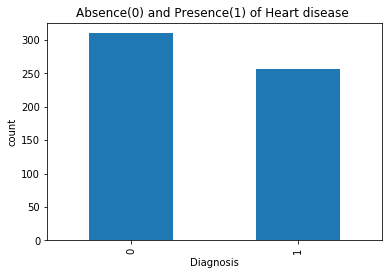

In [28]:
count.plot(kind='bar')
plt.title("Absence(0) and Presence(1) of Heart disease ")
plt.xlabel("Diagnosis")
plt.ylabel("count")
#heart_data.hist("Diagnosis")

In [29]:
x=df.drop('Diagnosis',axis=1) #independent variable
y=df['Diagnosis']         #dependent variable/output

In [30]:
x.shape, y.shape

((567, 25), (567,))

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [32]:
print('x_train',x_train.shape)
print('x_test ',x_test.shape)
print('y_train',y_train.shape)
print('y_test ',y_test.shape)

x_train (425, 25)
x_test  (142, 25)
y_train (425,)
y_test  (142,)


# Modeling

In [33]:
names=[] 
score=[]
error=[]
prec=[]
recall=[]
crossval=[]
spec=[]

# Logistic Regression

In [34]:
tuned_parameter=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
model_LR=GridSearchCV(LogisticRegression(),tuned_parameter,scoring='precision',n_jobs=-1,cv=10)
model_LR.fit(x_train,y_train)
print(model_LR.best_estimator_)
print('precision:- ',model_LR.score(x_test,y_test))

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
precision:-  0.8305084745762712


In [35]:
y_pred=model_LR.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_LR.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
names.append("model_LR")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

[[75 10]
 [ 8 49]]
Train Accuracy : 85.412 %
Test Accuracy  : 87.324 %
classification report of Log-Reg 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        85
           1       0.83      0.86      0.84        57

    accuracy                           0.87       142
   macro avg       0.87      0.87      0.87       142
weighted avg       0.87      0.87      0.87       142

0.1267605633802817


In [36]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)
print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
print("Specificity of logistic regression:- ",Specificity) #recall
prec.append(precision)
recall.append(sensitivity)
spec.append(Specificity)

precision of logistic regression:-  0.8305084745762712
sensitivity of logistic regression:-  0.8596491228070176
Specificity of logistic regression:-  0.8823529411764706


In [37]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_LR,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',accuracy.mean()) #mean of 10 accuracies of accuracies vector
print('std-dev: ',accuracy.std())  #standard deviation
crossval.append(accuracy.mean())

mean acc:-  0.8805340557275543
std-dev:  0.045525155706713664


# K-NN

In [38]:
params = {'n_neighbors':[i for i in range(1,35,2)]}
model_knn=GridSearchCV(KNeighborsClassifier(),params,scoring='precision',cv=10,n_jobs=-1)
model_knn.fit(x_train,y_train)
print(model_knn.best_estimator_)
print(model_knn.score(x_test,y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
0.9107142857142857


In [39]:
y_pred=model_knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of  KNN\n",classification_report(y_test,y_pred))
names.append("model_knn")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

[[80  5]
 [ 6 51]]
Train Accuracy : 100.0 %
Test Accuracy  : 92.254 %
classification report of  KNN
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        85
           1       0.91      0.89      0.90        57

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142

0.07746478873239436


In [40]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)
print("precision of KNN:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
print("Specificity of KNN:- ",Specificity) #recall
prec.append(precision)
recall.append(sensitivity)
spec.append(Specificity)

precision of KNN:-  0.9107142857142857
sensitivity of KNN:-  0.8947368421052632
Specificity of KNN:-  0.9411764705882353


In [41]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_knn,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',accuracy.mean()) #mean of 10 accuracies of accuracies vector
print('std-dev: ',accuracy.std())  #standard deviation
crossval.append(accuracy.mean())

mean acc:-  0.9431892230576441
std-dev:  0.04878132459866498


# SVM

In [42]:
parameter=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
model_svm=GridSearchCV(SVC(),parameter,scoring='precision',n_jobs=-1,cv=10)
model_svm.fit(x_train,y_train)
print(model_svm.best_estimator_)
print(model_svm.score(x_test,y_test))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.8253968253968254


In [43]:
y_pred=model_svm.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Svm\n",classification_report(y_test,y_pred))
names.append("model_svm")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

[[74 11]
 [ 5 52]]
Train Accuracy : 95.765 %
Test Accuracy  : 88.732 %
classification report of Svm
               precision    recall  f1-score   support

           0       0.94      0.87      0.90        85
           1       0.83      0.91      0.87        57

    accuracy                           0.89       142
   macro avg       0.88      0.89      0.88       142
weighted avg       0.89      0.89      0.89       142

0.11267605633802817


In [44]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of SVM:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec.append(Specificity)

precision of SVM:-  0.8253968253968254
sensitivity of SVM:-  0.9122807017543859
Specificity of SVM:-  0.8705882352941177


In [45]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_svm,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

mean acc:-  90.461 %
std-dev:  7.638 %


# Naive Bayes

In [46]:
model_nb=BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
y_pred=model_nb.predict(x_test)

In [48]:
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
names.append("model_nb")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

Confusion matrix:
 [[68 17]
 [ 6 51]]
Train Accuracy : 84.941 %
Test Accuracy  : 83.80300000000001 %
classification report of Naive Bayes
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        85
           1       0.75      0.89      0.82        57

    accuracy                           0.84       142
   macro avg       0.83      0.85      0.84       142
weighted avg       0.85      0.84      0.84       142

0.1619718309859155


In [49]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Naive_bayes:- ",precision) 
print("sensitivity of Naive_bayes:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec.append(Specificity)

precision of Naive_bayes:-  0.75
sensitivity of Naive_bayes:-  0.8947368421052632
Specificity of Naive Bayes:-  0.8


In [50]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_nb,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

mean acc:-  83.295 %
std-dev:  5.492 %


# Random Forest

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [52]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [53]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [54]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [55]:
y_pred=model_rf.predict(x_test)

In [56]:
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
names.append("model_rf")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

Confusion matrix:
 [[77  8]
 [ 3 54]]
Train Accuracy : 100.0 %
Test Accuracy  : 92.254 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        85
           1       0.87      0.95      0.91        57

    accuracy                           0.92       142
   macro avg       0.92      0.93      0.92       142
weighted avg       0.93      0.92      0.92       142

0.07746478873239436


In [57]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Random Forest:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec.append(Specificity)

precision of Random Forest:-  0.8709677419354839
sensitivity of Random Forest:-  0.9473684210526315
Specificity of Random Forest:-  0.9058823529411765


In [58]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_rf,X=x_train,y=y_train,cv=3) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


mean acc:-  91.754 %
std-dev:  3.7769999999999997 %


# Plot Result

Text(0, 0.5, 'performance% ')

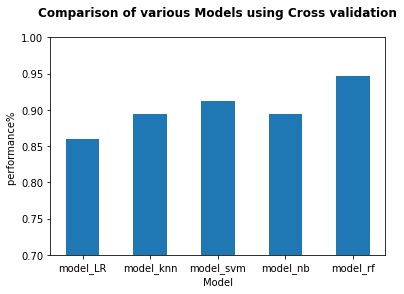

In [59]:
plt.title("Comparison of various Models using Cross validation\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('performance% ')

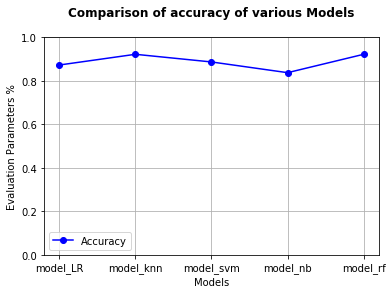

In [60]:
plt.figure(figsize=(6,4))
plt.ylim([0.0,1])
plt.plot(names,score,'-o',label="Accuracy",color='blue')
#plt.plot(names,error,'-d',label="Error",color='black')
plt.xlabel("Models")
plt.ylabel("Evaluation Parameters %")
plt.grid(True)
plt.legend()
plt.title("Comparison of accuracy of various Models\n",fontweight="bold")
plt.show()

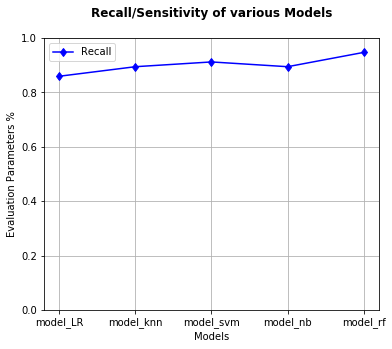

In [61]:
plt.figure(figsize=(6,5))
plt.ylim([0.0,1])
#plt.plot(names,prec,'-o',label="Precision",color='blue')
plt.plot(names,recall,'-d',label="Recall",color='blue')
plt.xlabel("Models")
plt.ylabel("Evaluation Parameters %")
plt.grid(True)
plt.legend()
plt.title("Recall/Sensitivity of various Models\n",fontweight="bold")
plt.show()

Text(0, 0.5, 'Sensitvity% ')

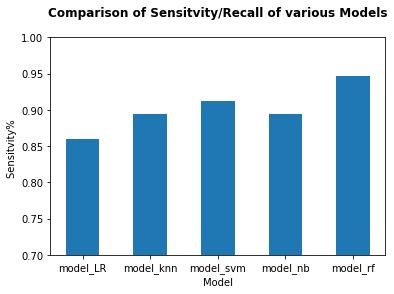

In [62]:
plt.title("Comparison of Sensitvity/Recall of various Models\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

Text(0, 0.5, 'Specificity% ')

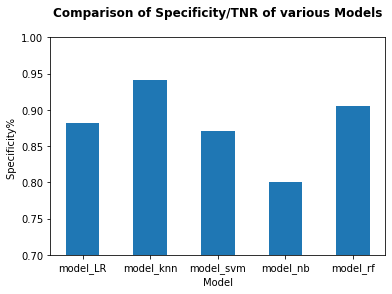

In [63]:
plt.title("Comparison of Specificity/TNR of various Models\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,spec,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')

# Feature Selection

# Chi2 

In [64]:
name=[]
sens=[]
score=[]
spec=[]

In [65]:
from sklearn.feature_selection import chi2

In [66]:
fscore=chi2(x_train,y_train)

In [67]:
p_value=pd.Series(fscore[1],index=x_train.columns)
p_value.sort_values(ascending=True,inplace=True)

In [68]:
p_value

cp_4.0                1.210626e-15
thal_7.0              6.596837e-14
exang                 6.222303e-13
thal_3.0              3.040154e-12
major_vessels_0.0     6.349540e-10
slope_1.0             6.517324e-09
slope_2.0             1.803759e-08
cp_3.0                4.734455e-08
cp_2.0                2.651777e-06
major_vessels_1.0     5.439834e-06
major_vessels_2.0     9.899790e-06
oldpeak               6.803489e-05
sex                   1.934930e-04
major_vessels_3.0     3.005976e-04
restecg_0.0           1.872971e-03
restecg_2.0           2.075893e-03
thal_6.0              7.862025e-03
cp_1.0                2.277473e-02
maximum_heart_rate    5.019622e-02
age                   1.854883e-01
slope_3.0             2.975662e-01
restbps               3.126973e-01
chol                  4.862371e-01
restecg_1.0           5.620826e-01
fbs                   9.383268e-01
dtype: float64

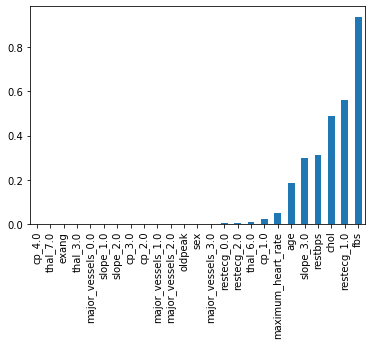

In [69]:
p_value.plot.bar()

In [70]:
x_train_chi2=x_train[['cp_4.0','thal_7.0','exang','thal_3.0','major_vessels_0.0','slope_1.0','slope_2.0','cp_3.0','cp_2.0'
                  ,'major_vessels_1.0','major_vessels_2.0','oldpeak','sex','major_vessels_3.0','restecg_0.0','restecg_2.0']]
x_test_chi2=x_test[['cp_4.0','thal_7.0','exang','thal_3.0','major_vessels_0.0','slope_1.0','slope_2.0','cp_3.0','cp_2.0'
                  ,'major_vessels_1.0','major_vessels_2.0','oldpeak','sex','major_vessels_3.0','restecg_0.0','restecg_2.0']]

In [71]:
#Logistic Regression(Using Chi2) 

In [72]:
model_LR=LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model_LR.fit(x_train_chi2,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred=model_LR.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_LR.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
name.append("model_LR")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

[[72 13]
 [ 8 49]]
Train Accuracy : 84.47099999999999 %
Test Accuracy  : 85.211 %
classification report of Log-Reg 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        85
           1       0.79      0.86      0.82        57

    accuracy                           0.85       142
   macro avg       0.85      0.85      0.85       142
weighted avg       0.86      0.85      0.85       142

0.14788732394366197


In [74]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of logistic regression:- ",Specificity) #recall
spec.append(Specificity)

sensitivity of logistic regression:-  0.8596491228070176
Specificity of logistic regression:-  0.8470588235294118


In [75]:
#K-NN(Using Chi2)

In [76]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train_chi2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [77]:
y_pred=model_knn.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
name.append("model_knn")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

[[75 10]
 [ 4 53]]
Train Accuracy : 97.41199999999999 %
Test Accuracy  : 90.141 %
classification report of Log-Reg 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        85
           1       0.84      0.93      0.88        57

    accuracy                           0.90       142
   macro avg       0.90      0.91      0.90       142
weighted avg       0.91      0.90      0.90       142

0.09859154929577464


In [78]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of KNN:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of KNN:- ",Specificity) #recall
spec.append(Specificity)

precision of KNN:-  0.8412698412698413
sensitivity of KNN:-  0.9298245614035088
Specificity of KNN:-  0.8823529411764706


In [79]:
#SVM(Using Chi2)

In [80]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model_svm.fit(x_train_chi2,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
y_pred=model_svm.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Svm\n",classification_report(y_test,y_pred))
name.append("model_svm")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

[[74 11]
 [ 7 50]]
Train Accuracy : 93.41199999999999 %
Test Accuracy  : 87.324 %
classification report of Svm
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        85
           1       0.82      0.88      0.85        57

    accuracy                           0.87       142
   macro avg       0.87      0.87      0.87       142
weighted avg       0.88      0.87      0.87       142

0.1267605633802817


In [82]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of SVM:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec.append(Specificity)

precision of SVM:-  0.819672131147541
sensitivity of SVM:-  0.8771929824561403
Specificity of SVM:-  0.8705882352941177


In [83]:
#Naive Bayes(Using Chi2)

In [84]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train_chi2,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [85]:
y_pred=model_nb.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
name.append("model_nb")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[67 18]
 [ 7 50]]
Train Accuracy : 84.0 %
Test Accuracy  : 82.394 %
classification report of Naive Bayes
               precision    recall  f1-score   support

           0       0.91      0.79      0.84        85
           1       0.74      0.88      0.80        57

    accuracy                           0.82       142
   macro avg       0.82      0.83      0.82       142
weighted avg       0.84      0.82      0.83       142

0.176056338028169


In [86]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Naive_bayes:- ",precision) 
print("sensitivity of Naive_bayes:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec.append(Specificity)

precision of Naive_bayes:-  0.7352941176470589
sensitivity of Naive_bayes:-  0.8771929824561403
Specificity of Naive Bayes:-  0.788235294117647


In [87]:
#Random Forest(Using Chi2)

In [88]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [89]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [90]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train_chi2, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [91]:
y_pred=model_rf.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
name.append("model_rf")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[76  9]
 [ 5 52]]
Train Accuracy : 97.882 %
Test Accuracy  : 90.141 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        85
           1       0.85      0.91      0.88        57

    accuracy                           0.90       142
   macro avg       0.90      0.90      0.90       142
weighted avg       0.90      0.90      0.90       142

0.09859154929577464


In [92]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Random Forest:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec.append(Specificity)

precision of Random Forest:-  0.8524590163934426
sensitivity of Random Forest:-  0.9122807017543859
Specificity of Random Forest:-  0.8941176470588236


# Plot Chi2 Result

Text(0, 0.5, 'Sensitvity%')

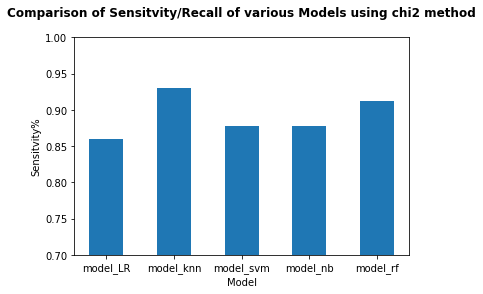

In [93]:
plt.title("Comparison of Sensitvity/Recall of various Models using chi2 method\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(name,sens,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity%')

Text(0, 0.5, 'Specificity%')

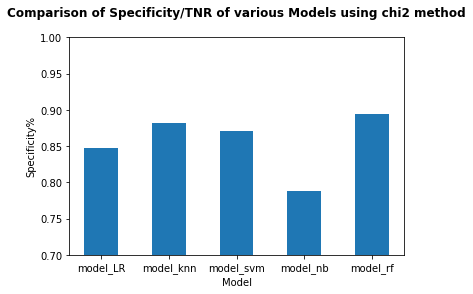

In [94]:
plt.title("Comparison of Specificity/TNR of various Models using chi2 method\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(name,spec,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity%')

# Wrapper Method

In [95]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

# Step Forward Selction Method 

In [96]:
model=[]
recall=[]
spec1=[]

In [97]:
# Logistic Regression (Step Forward)

In [98]:
sfs=SFS(LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False),
        k_features=(1,25), forward=True, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished

[2020-06-23 14:16:10] Features: 1/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished

[2020-06-23 14:16:10] Features: 2/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2020-06-23 14:16:10] Features: 3/25 -- score: 0.769463057661788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2020-06-23 14:16:10] Features: 4/25 -- score: 0.771

In [99]:
print(sfs.k_feature_names_)
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)

('age', 'restbps', 'chol', 'oldpeak', 'sex', 'fbs', 'exang', 'cp_1.0', 'cp_2.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'major_vessels_3.0', 'thal_3.0', 'thal_6.0')
[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23]
0.8518559336977605


In [100]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7383177570093458, 0.8113207547169812, 0.764...",0.767127,"(cp_4.0,)",0.043502,0.0271382,0.0156682
2,"(0, 11)","[0.7383177570093458, 0.8113207547169812, 0.764...",0.767127,"(age, cp_4.0)",0.043502,0.0271382,0.0156682
3,"(0, 11, 21)","[0.7476635514018691, 0.8113207547169812, 0.764...",0.769463,"(age, cp_4.0, major_vessels_3.0)",0.0398571,0.0248644,0.0143555
4,"(0, 4, 11, 21)","[0.7476635514018691, 0.8207547169811321, 0.764...",0.771822,"(age, oldpeak, cp_4.0, major_vessels_3.0)",0.0462472,0.0288508,0.016657
5,"(0, 4, 11, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.764...",0.776539,"(age, oldpeak, cp_4.0, major_vessels_3.0, thal...",0.050811,0.0316978,0.0183007
6,"(0, 4, 8, 11, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.773...",0.778897,"(age, oldpeak, cp_1.0, cp_4.0, major_vessels_3...",0.0497443,0.0310324,0.0179165
7,"(0, 1, 4, 8, 11, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.773...",0.781256,"(age, restbps, oldpeak, cp_1.0, cp_4.0, major_...",0.0483595,0.0301685,0.0174178
8,"(0, 1, 2, 4, 8, 11, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.773...",0.781256,"(age, restbps, chol, oldpeak, cp_1.0, cp_4.0, ...",0.0483595,0.0301685,0.0174178
9,"(0, 1, 2, 4, 8, 11, 13, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.773...",0.781256,"(age, restbps, chol, oldpeak, cp_1.0, cp_4.0, ...",0.0483595,0.0301685,0.0174178
10,"(0, 1, 2, 4, 8, 11, 13, 17, 21, 23)","[0.7476635514018691, 0.8301886792452831, 0.773...",0.781256,"(age, restbps, chol, oldpeak, cp_1.0, cp_4.0, ...",0.0483595,0.0301685,0.0174178


In [101]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [102]:
x_train2=x_train1[:, feat_cols]
x_train2.shape

(425, 20)

In [103]:
x_train2 = pd.DataFrame(x_train2)

In [104]:
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 20)

In [105]:
clf = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False)
#clf.fit(x_train.iloc[:, feat_cols].values, y_train)
clf.fit(x_train2, y_train)
y_train_pred = clf.predict(x_train2)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))
y_test_pred = clf.predict(x_test2)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.859
Testing accuracy on selected features: 0.859


In [106]:
cm=confusion_matrix(y_test,y_test_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,clf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_test_pred),5)*100,'%')
print("classification report of Logistic regression\n",classification_report(y_test,y_test_pred))
model.append("model_lr")
#score.append(accuracy_score(y_test,y_test_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[74 11]
 [ 9 48]]
Train Accuracy : 85.882 %
Test Accuracy  : 85.91499999999999 %
classification report of Logistic regression
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        85
           1       0.81      0.84      0.83        57

    accuracy                           0.86       142
   macro avg       0.85      0.86      0.85       142
weighted avg       0.86      0.86      0.86       142

0.14084507042253522


In [107]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Logistic Regression:- ",Specificity) #recall
spec1.append(Specificity)

sensitivity of logistic regression:-  0.8421052631578947
Specificity of Logistic Regression:-  0.8705882352941177


In [108]:
#KNN (Step Forward)

In [109]:
sfs=SFS(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
        k_features=(1,25), forward=True, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2020-06-23 14:16:17] Features: 1/25 -- score: 0.7083627226238759[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2020-06-23 14:16:17] Features: 2/25 -- score: 0.8541262563921707[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2020-06-23 14:16:17] Features: 3/25 -- score: 0.9036104743431495[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.3s finished

[2020-06-23 14:16:18] Features: 4/25 -- score: 0.917717333803562[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

In [110]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

('age', 'restbps', 'chol', 'oldpeak', 'sex', 'fbs', 'cp_1.0', 'cp_3.0', 'cp_4.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'major_vessels_3.0', 'thal_3.0', 'thal_6.0')
[0, 1, 2, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
0.9435064362546288


In [111]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [112]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 20)

In [113]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [114]:
y_pred=model_knn.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
model.append("model_k-NN")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[79  6]
 [ 5 52]]
Train Accuracy : 100.0 %
Test Accuracy  : 92.254 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.90      0.91      0.90        57

    accuracy                           0.92       142
   macro avg       0.92      0.92      0.92       142
weighted avg       0.92      0.92      0.92       142

0.07746478873239436


In [115]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of K-NN:- ",Specificity) #recall
spec1.append(Specificity)

sensitivity of KNN:-  0.9122807017543859
Specificity of K-NN:-  0.9294117647058824


In [116]:
# SVM (Step Forward)

In [117]:
sfs=SFS(SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2020-06-23 14:16:24] Features: 1/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2020-06-23 14:16:25] Features: 2/25 -- score: 0.7741800387938635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.5s finished

[2020-06-23 14:16:26] Features: 3/25 -- score: 0.7812334685240698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  22

In [118]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

('age', 'restbps', 'chol', 'maximum_heart_rate', 'oldpeak', 'exang', 'cp_1.0', 'cp_4.0', 'restecg_1.0', 'slope_1.0', 'slope_2.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0')
[0, 1, 2, 3, 4, 7, 8, 11, 13, 15, 16, 18, 19, 21, 22, 23, 24]
0.898871451243167


In [119]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [120]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 17)

In [121]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

model_svm.fit(x_train2,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [122]:
y_pred=model_svm.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of SVM\n",classification_report(y_test,y_pred))
model.append("model_svm")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[71 14]
 [ 8 49]]
Train Accuracy : 86.118 %
Test Accuracy  : 84.507 %
classification report of SVM
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        85
           1       0.78      0.86      0.82        57

    accuracy                           0.85       142
   macro avg       0.84      0.85      0.84       142
weighted avg       0.85      0.85      0.85       142

0.15492957746478872


In [123]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec1.append(Specificity)

sensitivity of SVM:-  0.8596491228070176
Specificity of SVM:-  0.8352941176470589


In [124]:
# Naive Bayes (Step Forward)

In [125]:
sfs=SFS(BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished

[2020-06-23 14:16:38] Features: 1/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2020-06-23 14:16:38] Features: 2/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2020-06-23 14:16:39] Features: 3/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2020-06-23 14:16:39] Features: 4/25 -- score: 0.76

In [126]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

('age', 'restbps', 'chol', 'maximum_heart_rate', 'oldpeak', 'cp_4.0', 'major_vessels_0.0', 'major_vessels_3.0', 'thal_3.0')
[0, 1, 2, 3, 4, 11, 18, 21, 22]
0.8565508728619291


In [127]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [128]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 9)

In [129]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train2,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [130]:
y_pred=model_nb.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
model.append("model_nb")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[76  9]
 [ 9 48]]
Train Accuracy : 85.882 %
Test Accuracy  : 87.324 %
classification report of Naive Bayes
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        85
           1       0.84      0.84      0.84        57

    accuracy                           0.87       142
   macro avg       0.87      0.87      0.87       142
weighted avg       0.87      0.87      0.87       142

0.1267605633802817


In [131]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Naive Bayes:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec1.append(Specificity)

sensitivity of Naive Bayes:-  0.8421052631578947
Specificity of Naive Bayes:-  0.8941176470588236


In [132]:
# Random Forest (Step Forward)

In [133]:
sfs=SFS(RandomForestClassifier(random_state=42),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.0s finished

[2020-06-23 14:16:45] Features: 1/25 -- score: 0.7671266090636573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.9s finished

[2020-06-23 14:16:46] Features: 2/25 -- score: 0.8070225709751367[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.0s finished

[2020-06-23 14:16:47] Features: 3/25 -- score: 0.8683433256921178[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.9s finished

[2020-06-23 14:16:48] Features: 4/25 -- score: 0.8942426379827191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [134]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

('restbps', 'chol', 'oldpeak', 'cp_1.0', 'cp_4.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0')
[1, 2, 4, 8, 11, 15, 16, 17, 18]
0.9318021512960677


In [135]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [136]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 9)

In [137]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [138]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [139]:
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train2, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [140]:
y_pred=model_rf.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
model.append("model_rf")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[76  9]
 [ 4 53]]
Train Accuracy : 100.0 %
Test Accuracy  : 90.845 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        85
           1       0.85      0.93      0.89        57

    accuracy                           0.91       142
   macro avg       0.90      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142

0.09154929577464789


In [141]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec1.append(Specificity)

sensitivity of Random Forest:-  0.9298245614035088
Specificity of Random Forest:-  0.8941176470588236


# Plot Step Forward Selection Result

Text(0, 0.5, 'Sensitvity% ')

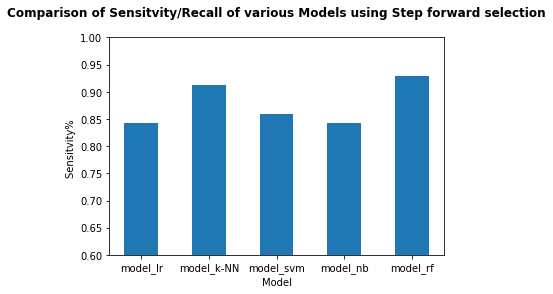

In [142]:
plt.title("Comparison of Sensitvity/Recall of various Models using Step forward selection\n",fontweight="bold")
plt.ylim([0.60,1.0])
plt.bar(model,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

Text(0, 0.5, 'Specificity% ')

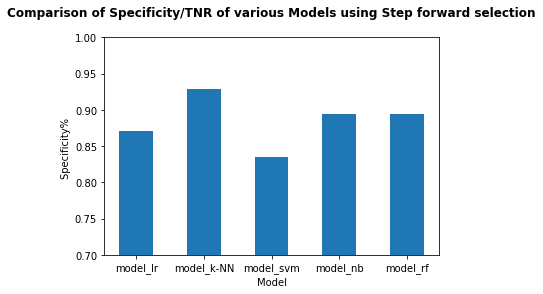

In [143]:
plt.title("Comparison of Specificity/TNR of various Models using Step forward selection\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(model,spec1,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')

# Step Backward Selection method

In [144]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

In [145]:
models=[]
sen=[]
spec2=[]

In [146]:
#Logistic Regression (Step Backward)

In [147]:
sbs=SFS(LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False),
        k_features=(1,25), forward=False, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2020-06-23 14:21:22] Features: 24/1 -- score: 0.8495194850996297[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2020-06-23 14:21:22] Features: 23/1 -- score: 0.8519000176335744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished

[2020-06-23 14:21:22] Features: 22/1 -- score: 0.8519000176335744[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22

In [148]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

('sex', 'exang', 'cp_4.0', 'slope_1.0', 'major_vessels_0.0', 'thal_7.0')
[5, 7, 11, 15, 18, 24]
0.8589314053958738


In [149]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [150]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 6)

In [151]:
clf = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False)
#clf.fit(x_train.iloc[:, feat_cols].values, y_train)
clf.fit(x_train2, y_train)
y_train_pred = clf.predict(x_train2)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))
y_test_pred = clf.predict(x_test2)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

Training accuracy on selected features: 0.868
Testing accuracy on selected features: 0.852


In [152]:
cm=confusion_matrix(y_test,y_test_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,clf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_test_pred),5)*100,'%')
print("classification report of Logistic regression\n",classification_report(y_test,y_test_pred))
models.append("model_lr")
#score.append(accuracy_score(y_test,y_test_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[71 14]
 [ 7 50]]
Train Accuracy : 86.824 %
Test Accuracy  : 85.211 %
classification report of Logistic regression
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        85
           1       0.78      0.88      0.83        57

    accuracy                           0.85       142
   macro avg       0.85      0.86      0.85       142
weighted avg       0.86      0.85      0.85       142

0.14788732394366197


In [153]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of logistic regression:- ",Specificity) #recall
spec2.append(Specificity)

sensitivity of logistic regression:-  0.8771929824561403
Specificity of logistic regression:-  0.8352941176470589


In [154]:
#K-NN(Step Backward)

In [155]:
sbs=SFS(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
        k_features=(1,25), forward=False, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.4s finished

[2020-06-23 14:21:26] Features: 24/1 -- score: 0.9411699876564981[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2020-06-23 14:21:27] Features: 23/1 -- score: 0.9458649268206665[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2020-06-23 14:21:27] Features: 22/1 -- score: 0.950581907952742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2020-06-23 14:21:28] Features: 21/1 -- score: 0.9529183565508728[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

In [156]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

('age', 'restbps', 'chol', 'oldpeak', 'sex', 'fbs', 'exang', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'thal_3.0', 'thal_6.0')
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23]
0.9529183565508728


In [157]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [158]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 21)

In [159]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train2,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [160]:
y_pred=model_knn.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
models.append("model_k-NN")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[77  8]
 [ 5 52]]
Train Accuracy : 100.0 %
Test Accuracy  : 90.845 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        85
           1       0.87      0.91      0.89        57

    accuracy                           0.91       142
   macro avg       0.90      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142

0.09154929577464789


In [161]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of K-NN:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of K-NN:- ",Specificity) #recall
spec2.append(Specificity)

sensitivity of K-NN:-  0.9122807017543859
Specificity of K-NN:-  0.9058823529411765


In [162]:
#SVM (Step Backward)

In [163]:
sbs=SFS(SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.5s finished

[2020-06-23 14:21:34] Features: 24/1 -- score: 0.8988494092752601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished

[2020-06-23 14:21:34] Features: 23/1 -- score: 0.9035223064715218[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2020-06-23 14:21:35] Features: 22/1 -- score: 0.910619820137542[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.5s finished

[2020-06-23 14:21:35] Features: 21/1 -- score: 0.9152927173338035[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

In [164]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

('age', 'restbps', 'sex', 'fbs', 'exang', 'cp_1.0', 'cp_2.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'slope_1.0', 'slope_2.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'thal_6.0', 'thal_7.0')
[0, 1, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19, 20, 23, 24]
0.9246825956621407


In [165]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [166]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 17)

In [167]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

model_svm.fit(x_train2,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [168]:
y_pred=model_svm.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of SVM\n",classification_report(y_test,y_pred))
models.append("model_svm")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[72 13]
 [ 8 49]]
Train Accuracy : 86.35300000000001 %
Test Accuracy  : 85.211 %
classification report of SVM
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        85
           1       0.79      0.86      0.82        57

    accuracy                           0.85       142
   macro avg       0.85      0.85      0.85       142
weighted avg       0.86      0.85      0.85       142

0.14788732394366197


In [169]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec2.append(Specificity)

sensitivity of SVM:-  0.8596491228070176
Specificity of SVM:-  0.8470588235294118


In [170]:
#Naive Bayes (Step Backward)

In [171]:
sbs=SFS(BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2020-06-23 14:21:41] Features: 24/1 -- score: 0.8470948686298713[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2020-06-23 14:21:42] Features: 23/1 -- score: 0.8518118497619468[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2020-06-23 14:21:42] Features: 22/1 -- score: 0.8542364662317051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22

In [172]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

('age', 'restbps', 'chol', 'maximum_heart_rate', 'fbs', 'exang', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'major_vessels_3.0', 'thal_6.0', 'thal_7.0')
[0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24]
0.8542364662317051


In [173]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [174]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 22)

In [175]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train2,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [176]:
y_pred=model_nb.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
models.append("model_nb")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[65 20]
 [ 8 49]]
Train Accuracy : 85.412 %
Test Accuracy  : 80.282 %
classification report of Naive Bayes
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        85
           1       0.71      0.86      0.78        57

    accuracy                           0.80       142
   macro avg       0.80      0.81      0.80       142
weighted avg       0.82      0.80      0.80       142

0.19718309859154928


In [177]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Naive Bayes:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec2.append(Specificity)

sensitivity of Naive Bayes:-  0.8596491228070176
Specificity of Naive Bayes:-  0.7647058823529411


In [178]:
#Random Forest Regression (Step Backward)

In [179]:
sbs=SFS(RandomForestClassifier(random_state=42),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    1.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2020-06-23 14:21:47] Features: 24/1 -- score: 0.9316919414565332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.3s finished

[2020-06-23 14:21:48] Features: 23/1 -- score: 0.931736025392347[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    1.2s finished

[2020-06-23 14:21:49] Features: 22/1 -- score: 0.9246825956621407[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.2s finished

[2020-06-23 14:21:51] Features: 21/1 -- score: 0.922

In [180]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

('age', 'chol', 'oldpeak', 'sex', 'cp_1.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'slope_2.0', 'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0', 'major_vessels_2.0', 'major_vessels_3.0', 'thal_7.0')
[0, 2, 4, 5, 8, 10, 11, 12, 16, 17, 18, 19, 20, 21, 24]
0.936563216363957


In [181]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [182]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

(142, 15)

In [183]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [184]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [185]:
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train2, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [186]:
y_pred=model_rf.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
models.append("model_rf")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

Confusion matrix:
 [[76  9]
 [ 3 54]]
Train Accuracy : 100.0 %
Test Accuracy  : 91.549 %
classification report of Random Forest
               precision    recall  f1-score   support

           0       0.96      0.89      0.93        85
           1       0.86      0.95      0.90        57

    accuracy                           0.92       142
   macro avg       0.91      0.92      0.91       142
weighted avg       0.92      0.92      0.92       142

0.08450704225352113


In [187]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec2.append(Specificity)

sensitivity of Random Forest:-  0.9473684210526315
Specificity of Random Forest:-  0.8941176470588236


# Plot Step Backward Selection Result

Text(0, 0.5, 'Sensitvity% ')

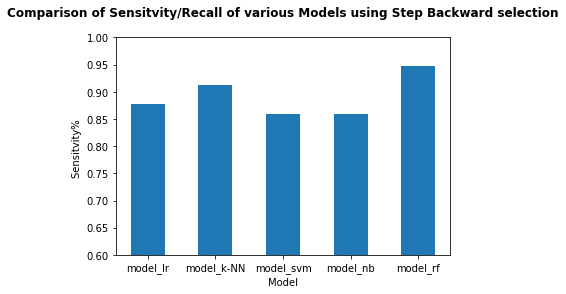

In [188]:
plt.title("Comparison of Sensitvity/Recall of various Models using Step Backward selection\n",fontweight="bold")
plt.ylim([0.60,1.0])
plt.bar(models,sen,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

Text(0, 0.5, 'Specificity% ')

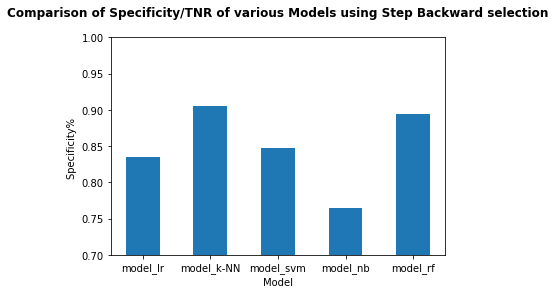

In [189]:
plt.title("Comparison of Specificity/TNR of various Models using Step Backward selection\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(models,spec2,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')